# Webscraping TripAdvisors
## -- Top 3 tourist attractions on TripAdvisors
* reference: https://www.worthwebscraping.com/how-to-scrape-tripadvisor-hotels-data-using-python/

### Goal

We planned to give our users options to input the city they want to go in California. However, for this first version of web scraping TripAdvisors, we assumed the users want to go to Los Angeles. What I want to achieve for this version is to briefly web scrape the names of the tourist attractions on the "Things to Do in Los Angeles" webpage on TripAdvisors and then get the locations of the top three recommended tourist attractions. Below is a screenshot of a part of the webpage.

"Things to Do in Los Angeles" website: https://www.tripadvisor.com/Attractions-g32655-Activities-a_allAttractions.true-Los_Angeles_California.html

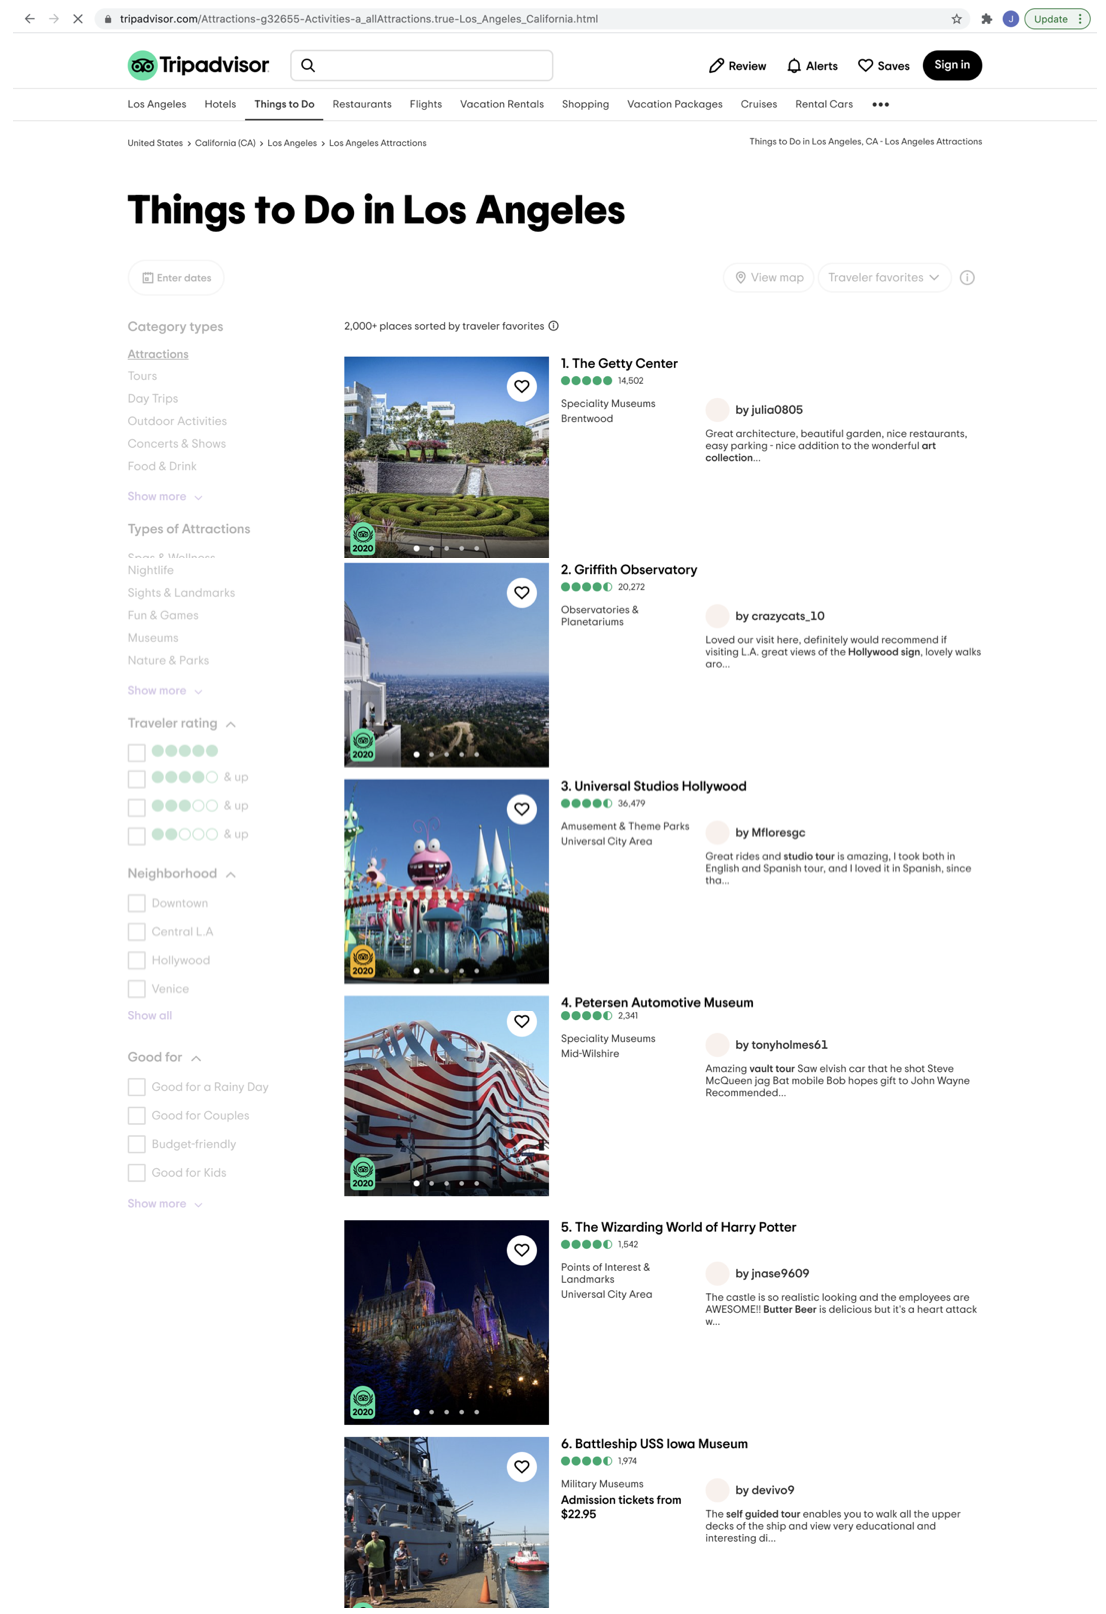

### Modules

The modules we will be using for this version of web scraping are:

- **pandas**: We will later use Pandas to create a dataframe for the name of each recommended tourist attraction and its html information after webscraping TripAdvisors.

- **requests**: The module that enables us to send HTTP requests so that we can receive all the response data.

- **BeautifulSoup**: I've searched online regarding more tutorials of webscraping and learned that BeautifulSoup is an extremely useful module when trying to get data from html.

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as soup

### Get the html

Firstly, we use the requests and BeautifulSoup modules to get the response data from the "Things to Do in Los Angeles" website.

In [2]:
html_main = requests.get("https://www.tripadvisor.com/Attractions-g32655-Activities-a_allAttractions.true-Los_Angeles_California.html")

In [3]:
bsobj_main = soup(html_main.content, "lxml")

On the "Things to Do in Los Angeles" website, I found out that I can click every name of the tourist attraction and will go to the description page for each tourist attraction. Then, by observing the "Devloper Tools", I found out that the html link is after "href". After trying several times and adding different restrictions to get the information I want, I finally got the content that are relevant for the html for each tourist attraction with the codes below, and I also added the html content for each tourist attraction in a list.

In [4]:
tourist_site_html = []
for site in bsobj_main.findAll("a", href = True):
    if (site["href"][-4:] == "html") & ("/Attraction_Review-g32655-" in site["href"]) & (site["href"] not in tourist_site_html):
        tourist_site_html.append(site["href"])
tourist_site_html

['/Attraction_Review-g32655-d147966-Reviews-The_Getty_Center-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d116887-Reviews-Griffith_Observatory-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d104417-Reviews-Universal_Studios_Hollywood-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d116989-Reviews-Petersen_Automotive_Museum-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d10116569-Reviews-The_Wizarding_World_of_Harry_Potter-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d2440929-Reviews-Battleship_USS_Iowa_Museum-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d8645857-Reviews-The_Broad-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d616425-Reviews-Staples_Center-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d129312-Reviews-Griffith_Park-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d547175-Reviews-The_Grove-Los_Angeles_California.html',
 '/Attraction_Review-g32655-d143830-Reviews-La_Brea

Then, I observed the above content and found out that I need to add few elements before each content to make it become a real html. By comparing different actual links for several tourist attractions, I found out that I added "https://www.tripadvisor.com/" for each element in the list and updated the list.

In [5]:
tourist_site_html_update = []
for site in tourist_site_html:
    tourist_site_html_update.append("https://www.tripadvisor.com/" + site)
tourist_site_html_update

['https://www.tripadvisor.com//Attraction_Review-g32655-d147966-Reviews-The_Getty_Center-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d116887-Reviews-Griffith_Observatory-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d104417-Reviews-Universal_Studios_Hollywood-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d116989-Reviews-Petersen_Automotive_Museum-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d10116569-Reviews-The_Wizarding_World_of_Harry_Potter-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d2440929-Reviews-Battleship_USS_Iowa_Museum-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d8645857-Reviews-The_Broad-Los_Angeles_California.html',
 'https://www.tripadvisor.com//Attraction_Review-g32655-d616425-Reviews-Staples_Center-Los_Angeles_California.html',

### Get the Names of the Tourist Attractions

After getting the html for all the recommended tourist attractions, I want to also get the name for each tourist attraction. Hence, I observed the html again and found out that the names are actually inside the html. Thus, I wanted to get the names by modifying and using the information from each link. By using split and replace, I sucessfully get all the names of the tourist attractions from the html.

In [6]:
tourist_site_name = []
tourist_site_html_update = tourist_site_html_update[:-2]
for k in tourist_site_html_update:
    tourist_site_name.append(k.split("Reviews-")[1].split("-Los_Angeles_California.html")[0].replace("_", " "))
tourist_site_name

['The Getty Center',
 'Griffith Observatory',
 'Universal Studios Hollywood',
 'Petersen Automotive Museum',
 'The Wizarding World of Harry Potter',
 'Battleship USS Iowa Museum',
 'The Broad',
 'Staples Center',
 'Griffith Park',
 'The Grove',
 'La Brea Tar Pits and Museum',
 'Walt Disney Concert Hall',
 'Natural History Museum of Los Angeles County',
 'Runyon Canyon Park',
 'Venice Canals Walkway',
 'The Nethercutt Collection',
 'Dodger Stadium',
 'Union Station',
 'Hollywood Sign',
 'Bradbury Building',
 'Lake Hollywood Park',
 'Universal CityWalk Hollywood',
 'Los Angeles County Museum of Art',
 'Madame Tussauds Hollywood',
 'Abbot Kinney Boulevard',
 'Angels Flight Railway',
 'University of California Los Angeles UCLA',
 'Hollywood Forever Cemetery',
 'Citadel Outlets',
 'Pantages Theatre',
 'Topanga State Park',
 'Will Rogers State Historic Park']

### Form the Data

In order to make the dataframe of the recommended tourist attractions better, I want to also include the rank of all the places. After successfully preparing rank, tourist site name, and html, I created a dataframe by using the information I webscraped and modified.

In [7]:
rank = []
for i in range(len(tourist_site_name)):
    rank.append(i + 1)
data = {"Rank": rank, "Tourist Site Name": tourist_site_name, "html": tourist_site_html_update}
df = pd.DataFrame.from_dict(data)
df

,Rank,Tourist Site Name,html
0,1,The Getty Center,https://www.tripadvisor.com//Attraction_Review...
1,2,Griffith Observatory,https://www.tripadvisor.com//Attraction_Review...
2,3,Universal Studios Hollywood,https://www.tripadvisor.com//Attraction_Review...
3,4,Petersen Automotive Museum,https://www.tripadvisor.com//Attraction_Review...
4,5,The Wizarding World of Harry Potter,https://www.tripadvisor.com//Attraction_Review...
5,6,Battleship USS Iowa Museum,https://www.tripadvisor.com//Attraction_Review...
6,7,The Broad,https://www.tripadvisor.com//Attraction_Review...
7,8,Staples Center,https://www.tripadvisor.com//Attraction_Review...
8,9,Griffith Park,https://www.tripadvisor.com//Attraction_Review...
9,10,The Grove,https://www.tripadvisor.com//Attraction_Review...


### Get the Locations

We planned to make our users to manually select the tourist sites they want to go based on the recommended places above. However, for this version, we directly assume the users want to go to the top three tourist sites.

In [70]:
visit_html = df.loc[0:2]["html"]
visit_html

0    https://www.tripadvisor.com//Attraction_Review...
1    https://www.tripadvisor.com//Attraction_Review...
2    https://www.tripadvisor.com//Attraction_Review...
Name: html, dtype: object

I want to make an empty list, called location, that will add each location of the first top three tourist attractions.

In [71]:
location = []

Similar to the first step when trying to find the html, I want to find the name of the location for the tourist attraction. By observing the Devloper Tool, I found out the name of the location is always in the "LjCWTZdN" class with "Los Angeles, CA". Thus, I used the requests and BeautifulSoup again to get the response data from the html I got before for each tourist attraction to get the location.

In [72]:
html = requests.get(visit_html[0])
bsobj = soup(html1.content, "lxml")
for loc in bsobj.findAll("div",{"class":"LjCWTZdN"}):
    if "Los Angeles, CA" in loc.text.strip():
        location.append(loc.text.strip())
location

['1200 Getty Center Dr N Sepulveda Blvd & Getty Center Dr, Los Angeles, CA 90049-1657']

In [73]:
html = requests.get(visit_html[1])
bsobj = soup(html.content, "lxml")
for loc in bsobj.findAll("div",{"class":"LjCWTZdN"}):
    if "Los Angeles, CA" in loc.text.strip():
        location.append(loc.text.strip())
location

['1200 Getty Center Dr N Sepulveda Blvd & Getty Center Dr, Los Angeles, CA 90049-1657',
 '2800 E. Observatory Rd., Los Angeles, CA 90027-1299']

In [74]:
html = requests.get(visit_html[2])
bsobj = soup(html.content, "lxml")
for loc in bsobj.findAll("div",{"class":"LjCWTZdN"}):
    if "Los Angeles, CA" in loc.text.strip():
        location.append(loc.text.strip())
location

['1200 Getty Center Dr N Sepulveda Blvd & Getty Center Dr, Los Angeles, CA 90049-1657',
 '2800 E. Observatory Rd., Los Angeles, CA 90027-1299',
 '100 Universal City Plaza, Los Angeles, CA 91608-1002']

The final output of the three locations I got above can be directly used for the route visualization.

### What I still ne